In [1]:
from learningBase import ReinforceAlgorithm
from environmentModelBase import Model, AdversaryModes
from neuralNetworkSimple import NNBase
import torch
import torch.nn as nn
from torch.distributions import Categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1/2
adversaryProbs[2]=1/2

game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 3, adversaryProbs=adversaryProbs, advHistoryNum=3)

In [3]:
hyperParams=[0.00001, 1, 0]
codeParams=[1, 10000, 1, 1]

lr=hyperParams[0]

policy reset
----------------------------------------
iter  0  stage  2  ep  9999   adversary:  AdversaryModes.constant_95
  actions:  tensor([0, 1, 1])
loss=  tensor(-0.0001, grad_fn=<NegBackward0>)   ,  base rewards= tensor([0.3260, 0.3260, 0.3260]) return=  12354.7119140625
probs of actions:  tensor([0.4312, 0.3480, 0.3538], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5112, 0.3984, 0.3259])
finalReturns:  tensor([-0.0001])
----------------------------------------
iter  0  stage  2  ep  19999   adversary:  AdversaryModes.constant_95
  actions:  tensor([1, 1, 0])
loss=  tensor(-0., grad_fn=<NegBackward0>)   ,  base rewards= tensor([0.3281, 0.3281, 0.3281]) return=  12407.7822265625
probs of actions:  tensor([0.1827, 0.1950, 0.8738], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5111, 0.4015, 0.3281])
finalReturns:  tensor([0.])
----------------------------------------
iter  0  stage  2  ep  29999   adversary:  AdversaryModes.myopic
  actions:  tensor([0, 0, 0])
loss=  tensor(-0., grad_f

----------------------------------------
iter  1  stage  1  ep  9999   adversary:  AdversaryModes.myopic
  actions:  tensor([9, 7, 0])
loss=  tensor(0.0535, grad_fn=<NegBackward0>)   ,  base rewards= tensor([1.1363, 1.1363, 0.5663]) return=  16611.5
probs of actions:  tensor([0.0487, 0.0918, 0.9427], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5031, 0.5651, 0.5929])
finalReturns:  tensor([0.0217, 0.0266])
----------------------------------------
iter  1  stage  1  ep  19999   adversary:  AdversaryModes.constant_95
  actions:  tensor([8, 9, 0])
loss=  tensor(0.0352, grad_fn=<NegBackward0>)   ,  base rewards= tensor([0.7645, 0.7645, 0.3404]) return=  12880.1181640625
probs of actions:  tensor([0.1875, 0.1643, 0.9460], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5048, 0.4160, 0.3672])
finalReturns:  tensor([0.0187, 0.0268])
----------------------------------------
iter  1  stage  1  ep  29999   adversary:  AdversaryModes.constant_95
  actions:  tensor([3, 8, 3])
loss=  tensor(0.1520, grad

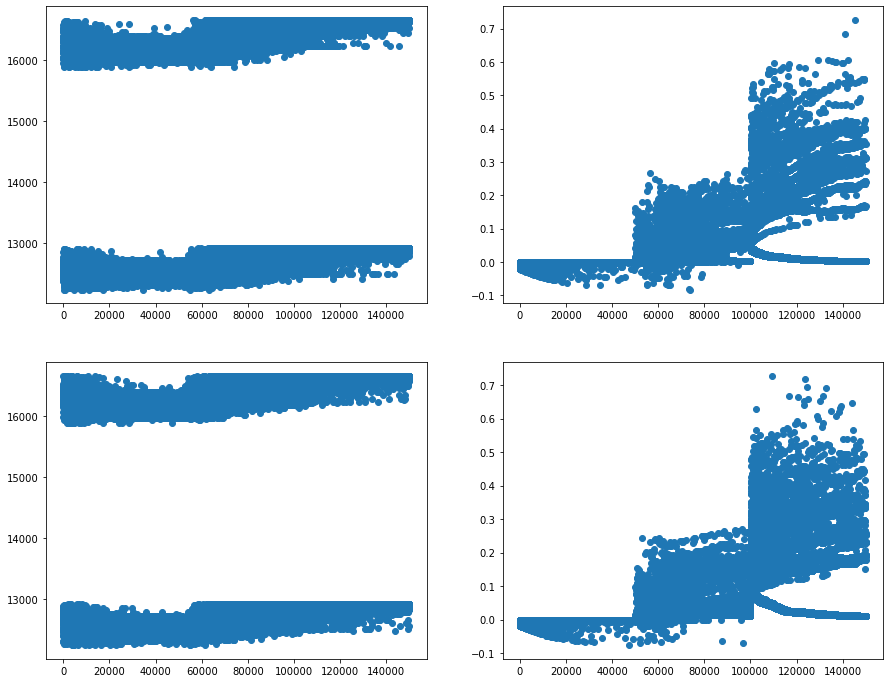

In [4]:
neuralNet=NNBase(num_input=game.T+2+game.advHistoryNum, lr=hyperParams[0],num_actions=10)
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=2, numberEpisodes=150_000, discountFactor =hyperParams[1])


algorithm.solver(print_step=10_000,options=codeParams,converge_break=False)


policy reset
----------------------------------------
iter  0  stage  2  ep  9999   adversary:  AdversaryModes.myopic
  actions:  tensor([0, 0, 0])
loss=  tensor(-0., grad_fn=<NegBackward0>)   ,  base rewards= tensor([0.5495, 0.5495, 0.5495]) return=  15972.328125
probs of actions:  tensor([0.5012, 0.5468, 0.6858], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5112, 0.5366, 0.5495])
finalReturns:  tensor([0.])
----------------------------------------
iter  0  stage  2  ep  19999   adversary:  AdversaryModes.guess_132
  actions:  tensor([0, 0, 0])
loss=  tensor(-0., grad_fn=<NegBackward0>)   ,  base rewards= tensor([0.5334, 0.5334, 0.5334]) return=  15683.9541015625
probs of actions:  tensor([0.7822, 0.8259, 0.9408], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5112, 0.5238, 0.5334])
finalReturns:  tensor([0.])
----------------------------------------
iter  0  stage  2  ep  29999   adversary:  AdversaryModes.myopic
  actions:  tensor([0, 0, 0])
loss=  tensor(-0., grad_fn=<NegBackward0>)   

----------------------------------------
iter  1  stage  1  ep  9999   adversary:  AdversaryModes.myopic
  actions:  tensor([0, 0, 4])
loss=  tensor(-0.0119, grad_fn=<NegBackward0>)   ,  base rewards= tensor([1.0860, 1.0860, 0.5495]) return=  15956.328125
probs of actions:  tensor([0.4298, 0.1621, 0.0036], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5112, 0.5366, 0.5479])
finalReturns:  tensor([-0.0016, -0.0016])
----------------------------------------
iter  1  stage  1  ep  19999   adversary:  AdversaryModes.guess_132
  actions:  tensor([0, 5, 0])
loss=  tensor(0.0419, grad_fn=<NegBackward0>)   ,  base rewards= tensor([1.0572, 1.0572, 0.5334]) return=  15843.0947265625
probs of actions:  tensor([0.1945, 0.0772, 0.9427], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5112, 0.5213, 0.5518])
finalReturns:  tensor([0.0159, 0.0184])
----------------------------------------
iter  1  stage  1  ep  29999   adversary:  AdversaryModes.guess_132
  actions:  tensor([9, 5, 0])
loss=  tensor(0.0559, 

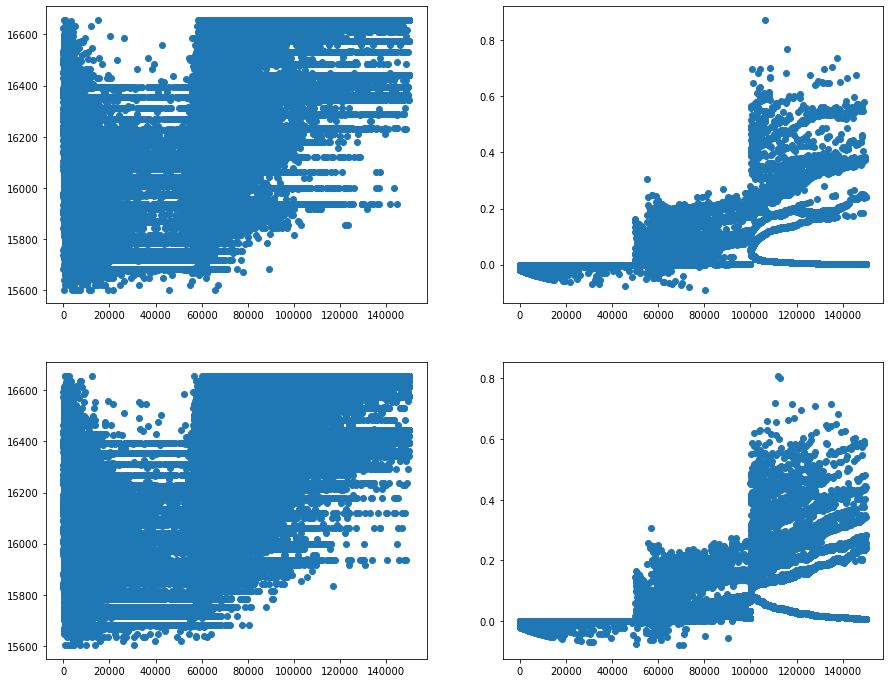

In [5]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1/2
adversaryProbs[10]=1/2

game2 = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 3, adversaryProbs=adversaryProbs, advHistoryNum=3)
neuralNet2=NNBase(num_input=game2.T+2+game2.advHistoryNum, lr=hyperParams[0],num_actions=10)
algorithm2 = ReinforceAlgorithm(game2, neuralNet2, numberIterations=2, numberEpisodes=150_000, discountFactor =hyperParams[1])


algorithm2.solver(print_step=10_000,options=codeParams,converge_break=False)


policy reset
----------------------------------------
iter  0  stage  2  ep  4999   adversary:  AdversaryModes.myopic
  actions:  tensor([0, 9, 1])
loss=  tensor(-9.9287e-05, grad_fn=<NegBackward0>)   ,  base rewards= tensor([0.5833, 0.5833, 0.5833]) return=  16228.953125
probs of actions:  tensor([0.2623, 0.0413, 0.3706], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5112, 0.5285, 0.5832])
finalReturns:  tensor([-0.0001])
----------------------------------------
iter  0  stage  2  ep  9999   adversary:  AdversaryModes.myopic
  actions:  tensor([1, 1, 0])
loss=  tensor(-0., grad_fn=<NegBackward0>)   ,  base rewards= tensor([0.5550, 0.5550, 0.5550]) return=  16062.75
probs of actions:  tensor([0.3145, 0.3380, 0.4951], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5111, 0.5401, 0.5550])
finalReturns:  tensor([0.])
----------------------------------------
iter  0  stage  2  ep  14999   adversary:  AdversaryModes.imitation_132
  actions:  tensor([2, 0, 0])
loss=  tensor(-0., grad_fn=<NegBackwa

----------------------------------------
iter  0  stage  0  ep  4999   adversary:  AdversaryModes.imitation_132
  actions:  tensor([9, 9, 0])
loss=  tensor(0.0133, grad_fn=<NegBackward0>)   ,  base rewards= tensor([1.5237, 1.0125, 0.4887]) return=  15972.0400390625
probs of actions:  tensor([0.8788, 0.9730, 0.9722], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5031, 0.5488, 0.5453])
finalReturns:  tensor([0.0735, 0.0816, 0.0566])
----------------------------------------
iter  0  stage  0  ep  9999   adversary:  AdversaryModes.imitation_132
  actions:  tensor([9, 9, 0])
loss=  tensor(0.0094, grad_fn=<NegBackward0>)   ,  base rewards= tensor([1.5237, 1.0125, 0.4887]) return=  15972.0400390625
probs of actions:  tensor([0.9196, 0.9793, 0.9740], grad_fn=<ExpBackward0>)
rewards:  tensor([0.5031, 0.5488, 0.5453])
finalReturns:  tensor([0.0735, 0.0816, 0.0566])
----------------------------------------
iter  0  stage  0  ep  14999   adversary:  AdversaryModes.myopic
  actions:  tensor([9, 9, 0]

TypeError: 'AxesSubplot' object is not subscriptable

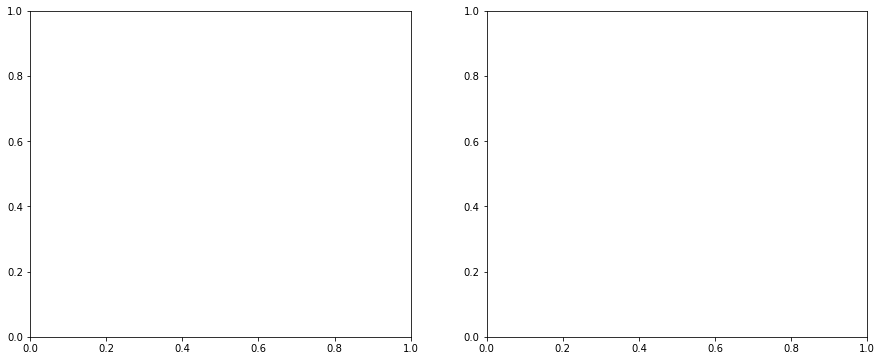

In [6]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1/2
adversaryProbs[3]=1/2

game3 = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 3, adversaryProbs=adversaryProbs, advHistoryNum=3)
neuralNet3=NNBase(num_input=game3.T+2+game3.advHistoryNum, lr=hyperParams[0],num_actions=10)
algorithm3 = ReinforceAlgorithm(game3, neuralNet2, numberIterations=1, numberEpisodes=150_000, discountFactor =hyperParams[1])


algorithm3.solver(print_step=5_000,options=codeParams,converge_break=False)

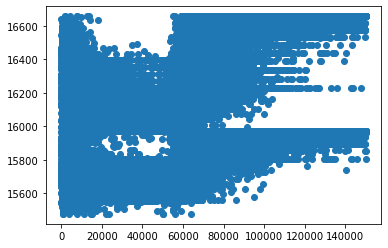

In [9]:
plt.scatter(range(len(algorithm3.returns[0])),algorithm3.returns[0])